<a href="https://colab.research.google.com/github/vadim-vic/Signal-separation/blob/main/11_GetData_FindTheBasis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Reconstruct the mixed signal given a known basis
# Also introduce a new data generation procedure

In [ ]:
# Read the data flies and import functions
import numpy as np
import matplotlib.pyplot as plt
import json
from google.colab import drive
drive.mount('/content/drive')
import sys
f_path = '/content/drive/MyDrive/AlohaCollisionDetector'
sys.path.insert(0,f_path)
# %ls {f_path}

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Fill the library with centroids
idx_clusters = {(762, 647, 7, 169, 794, 331, 886, 183, 538, 859), (195, 612, 133, 325, 40, 136, 733, 171, 844, 936, 494, 463, 439, 88, 985, 955, 189, 734), (385, 738, 840, 112, 146, 530, 831), (224, 800, 5, 281, 517, 711, 9, 586, 842, 535, 152, 121, 862), (777, 267, 664, 555, 815, 566, 185, 698, 709, 837, 456, 594, 731, 860, 606, 996, 358, 619, 627), (514, 645, 775, 264, 265, 393, 520, 791, 413, 286, 543, 38, 294, 309, 949, 316, 318, 726, 987, 997, 511), (471, 578, 681, 28, 527, 498, 403, 468, 277, 245, 438, 377, 220, 319), (577, 865, 259, 452, 389, 361, 969, 523, 273, 595, 767, 952, 797, 191), (321, 162, 994, 356, 774, 295, 491, 269, 909, 368, 785, 434, 499, 881), (672, 100, 613, 932, 71, 487, 970, 303, 274, 658, 729), (384, 352, 552, 876, 973, 696, 728, 766, 692, 820, 792, 61, 30, 447), (513, 398, 787, 409, 921, 174, 433, 563, 53, 450, 454, 332, 591, 83, 485, 877, 878, 892, 637, 254, 383), (802, 771, 901, 744, 600, 683, 461, 366, 976, 529, 338, 536, 890, 700, 829, 510, 415), (386, 29, 35, 678, 42, 568, 317, 832, 327, 713, 216, 990, 350, 223, 353, 102, 753, 246, 247), (963, 682, 107, 251, 655, 50, 984, 187), (544, 928, 34, 549, 679, 967, 459, 588, 972, 814, 855, 80, 951, 818, 308, 663, 57), (65, 741, 262, 614, 235, 587, 748, 430, 558, 114, 179, 978, 918, 151, 694, 506, 95), (993, 515, 231, 810, 906, 782, 175, 560, 783, 210, 371, 853, 182, 375, 636, 445), (641, 905, 525, 142, 147, 659, 427, 428, 812, 305, 823, 184, 314, 571, 194, 581, 843, 854, 215, 605, 868, 364, 751, 382), (899, 67, 44, 78, 703, 84, 666, 891, 285, 287), (609, 418, 930, 518, 712, 590, 654, 910, 948, 373, 917, 408, 249, 953, 988, 893, 894), (354, 706, 132, 451, 137, 10, 299, 938, 334, 888, 633, 186, 155, 607), (387, 400, 21, 407, 291, 807, 553, 178, 306, 59, 63, 82, 470, 856, 94, 228, 374, 889, 124), (288, 481, 98, 992, 36, 838, 871, 424, 302, 432, 592, 691, 924), (394, 279, 923, 806, 935, 688, 188, 958, 960, 458, 718, 977, 339, 85, 597, 347, 242, 634, 127), (737, 37, 550, 455, 202, 460, 653, 749, 781, 49, 379, 276, 437, 983, 158, 765, 222, 763), (1, 97, 324, 968, 201, 149, 213, 981, 539), (3, 422, 839, 72, 939, 473, 14, 48, 466, 819, 55, 217, 764), (225, 257, 995, 134, 742, 870, 173, 975, 528, 278, 758, 24, 346, 60, 799), (675, 292, 869, 599, 359, 8, 232, 297, 426, 908, 813, 965, 982, 572, 476, 828, 509, 62), (256, 322, 453, 329, 496, 848, 370, 340, 148, 312, 478), (611, 70, 326, 616, 234, 492, 205, 46, 493, 752, 52, 405, 150, 825, 601, 827, 93), (416, 768, 962, 548, 168, 618, 811, 301, 141, 944, 884, 280, 477), (545, 580, 484, 646, 39, 746, 238, 367, 850, 501, 214, 760, 25), (128, 769, 803, 101, 841, 524, 333, 465, 497, 562, 979, 502, 695, 313, 858, 735), (954, 673, 804, 166, 583, 330, 76, 686, 623, 942, 113, 690, 337, 22, 603, 123, 444, 830), (576, 33, 522, 650, 778, 621, 143, 207, 79, 879, 851, 436, 701), (320, 864, 872, 617, 395, 13, 847, 402, 883, 467, 822, 727, 344, 732, 159), (448, 801, 129, 643, 391, 488, 846, 912, 18, 786, 629), (770, 4, 135, 903, 780, 915, 153, 420, 165, 934, 561, 817, 323, 198, 722, 212, 863, 482, 227, 610, 486, 250, 252), (66, 933, 103, 907, 429, 239, 208, 431, 495, 117, 697, 604, 638), (260, 138, 284, 163, 676, 554, 689, 945, 565, 311, 569, 699, 574, 836, 69, 966, 596, 89, 475, 348, 230), (674, 805, 551, 635, 92, 882, 946, 947, 857, 505, 315, 956, 31), (704, 705, 644, 648, 585, 298, 362, 620, 808, 111, 310, 56, 218, 446), (897, 99, 388, 197, 998, 392, 170, 779, 300, 206, 719, 625, 757, 761, 157), (736, 419, 104, 649, 266, 714, 652, 268, 180, 500, 125, 479), (6, 200, 759, 236, 557, 219, 15, 684, 880, 20, 181, 54, 919, 661, 91, 540, 989), (423, 904, 73, 489, 75, 490, 575, 845, 47, 875, 925, 914, 341, 118, 885, 26, 349, 255), (773, 12, 531, 662, 920, 793, 154, 425, 570, 74, 725, 86, 343, 986, 233, 241, 116, 507, 895), (512, 866, 390, 77, 974, 685, 464, 657, 717, 435, 564, 849, 980, 602), (226, 357, 122, 105, 140, 622, 784, 537, 90, 380, 927), (480, 640, 258, 642, 964, 261, 263, 556, 943, 469, 821, 665, 442, 826, 670), (651, 795, 411, 931, 164, 172, 559, 304, 307, 441, 589, 336, 342, 867, 503, 743, 756, 887, 378), (32, 929, 417, 833, 521, 937, 81, 145, 51, 721, 693, 755, 87, 351), (160, 64, 96, 516, 421, 708, 584, 106, 365, 526, 941, 816, 209, 913, 27, 156, 957), (192, 290, 483, 582, 199, 472, 874, 144, 176, 401, 926, 950, 23, 632, 922, 508, 542, 991), (0, 130, 900, 519, 911, 275, 660, 916, 790, 796, 669, 546, 567, 58, 193, 971, 248, 615, 240, 754, 504), (902, 776, 404, 533, 667, 798, 161, 547, 293, 702, 457, 593, 608, 229, 363, 237, 750, 630, 631), (898, 399, 272, 656, 852, 372, 598, 120, 730, 412, 671), (396, 397, 788, 410, 45, 440, 573, 961, 707, 196, 710, 715, 462, 720, 861, 221, 355, 360, 244, 376), (131, 68, 677, 680, 745, 108, 270, 335, 16, 19, 723, 443, 190, 639), (896, 2, 17, 532, 534, 406, 959, 579, 204, 345, 999, 747, 109, 110, 369, 626, 628, 253, 126), (289, 328, 809, 873, 43, 940, 271, 624, 474, 115, 789, 119, 282, 283, 668, 541, 414), (449, 739, 740, 772, 167, 41, 11, 139, 203, 716, 687, 177, 211, 243, 381)}
# Convert the list of sets into the dictionary
dict_cluster = {c[0]: list(c[:]) for c in idx_clusters}
# print(dict_cluster)
# iqlib = iqdata[list(dict_cluster.keys())]

In [ ]:
f_prefx = '/data/inphase_quadrature_'
with open(f_path + f_prefx + 'data.json') as f:
  data = np.array(json.load(f))
with open(f_path + f_prefx + 'noise.json') as f:
  noise = np.array(json.load(f))
# Comvert the data to comples vectiors
iqdata = data[:,0,:] + 1j*data[:,1,:]
iqnoise = noise[:,0,:] + 1j*noise[:,1,:]

In [ ]:
# Import functions and keep some local functions
from functions import find_shiftX_exhaust, shift_x
from plots import plt_clust_Xy

In [ ]:
# @title
def shift_X(X, shifts):
  # Call shift_x for each column in the matrix X
  for j in range(len(shifts)):
    X[:,j] = shift_x(X[:,j], shifts[j])
  return X

def scale_separate(data, coeffs):
  # Each row of the data is a complex vector to scale
  # Scale to max(abs) real and imag parts independently
  # Scale each vecor by real coefficient
  data_scaled = data.copy()
  for i, (signal, coeff) in enumerate(zip(data, coeffs)):
    signal_scaled = scale_separate_x(signal, coeff)
    data_scaled[i] = signal_scaled
  return data_scaled

def scale_complex(data, coeffs):
  # Each row of the data is a complex vector to scale
  # Scale to max(abs) real and imag parts so that
  # The amplitude is the root mean square of I and Q the signal is coeff.
  data_scaled = data.copy()
  for i, (signal, coeff) in enumerate(zip(data, coeffs)):
    signal_scaled = scale_separate_x(signal, coeff)
    data_scaled[i] = signal_scaled
  return data_scaled

def scale_separate_x(signal, coeff):
  # The signal is a complex vector to scale
  # Scale to max(abs) real and imag parts independently
  # Scale vecor by real coefficient
  max_real = np.max(np.abs(signal.real))
  if max_real == 0:
    signal_real = signal.real
  else:
    signal_real = signal.real / max_real
  max_imag = np.max(np.abs(signal.imag))
  if max_imag == 0:
    signal_imag = signal.imag
  else:
    signal_imag = signal.imag / np.max(np.abs(signal.imag))
  signal_scaled = coeff * signal_real + 1j * coeff * signal_imag
  return signal_scaled

def scale_complex_x(data, coeff):
  # The signal is a complex vector to scale
  # Scale to max(abs) real and imag parts so that
  # The amplitude is the root mean square of I and Q the signal is coeff.
  signal_rms = np.sqrt(np.mean(np.abs(signal)**2))
  if signal_rms > 0:
    signal_scaled = signal * (coeff / signal_rms)
  else:
    signal_scaled = signal # No scaling for zero
  return signal_scaled

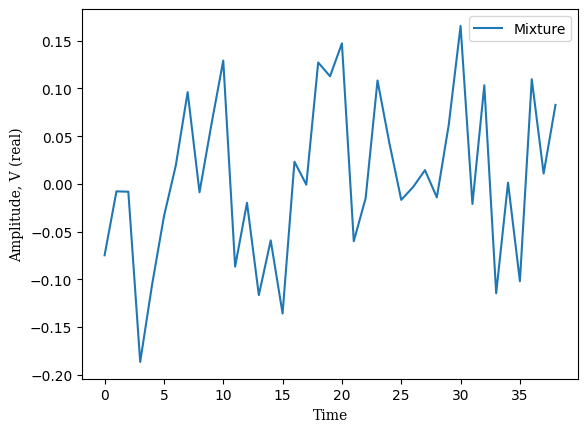

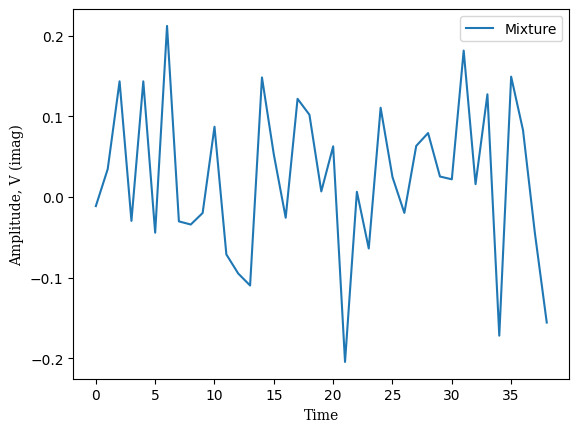

Append class: 0, centroids: [], sources: [], mixture coefficients: [], shifts: []


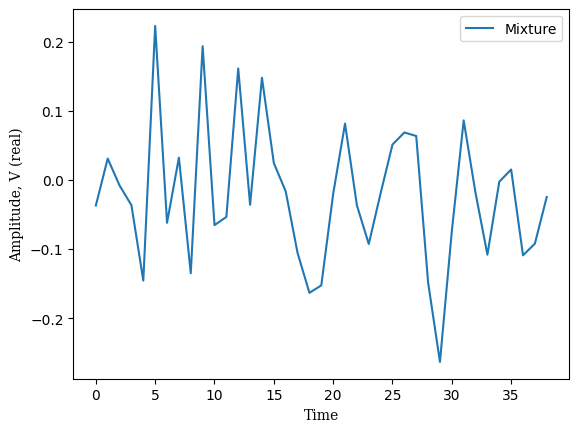

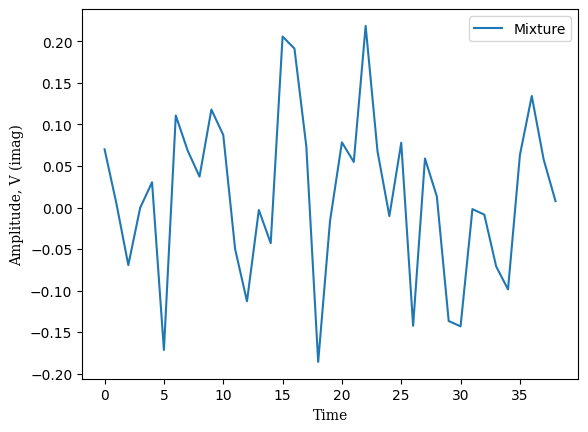

Append class: 0, centroids: [], sources: [], mixture coefficients: [], shifts: []
Class: 1, centroid: 545, source: 580, shift: -2)


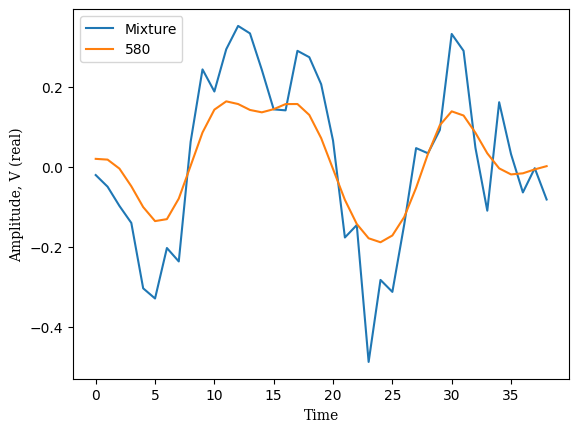

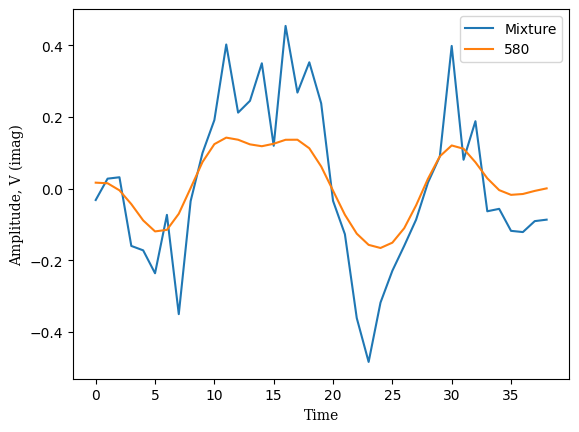

Append class: 1, centroids: [545], sources: [580], mixture coefficients: [0.33380626], shifts: [-2]
Class: 1, centroid: 288, source: 481, shift: 2)


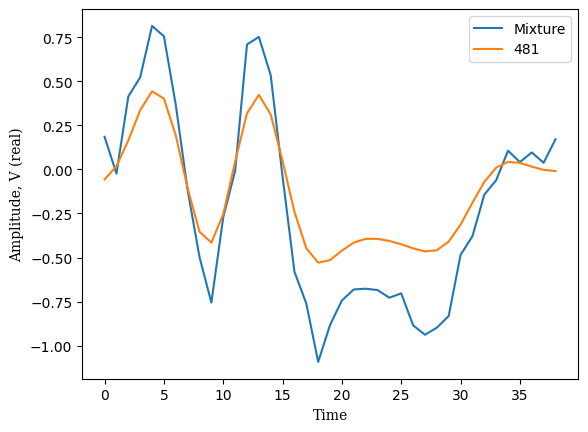

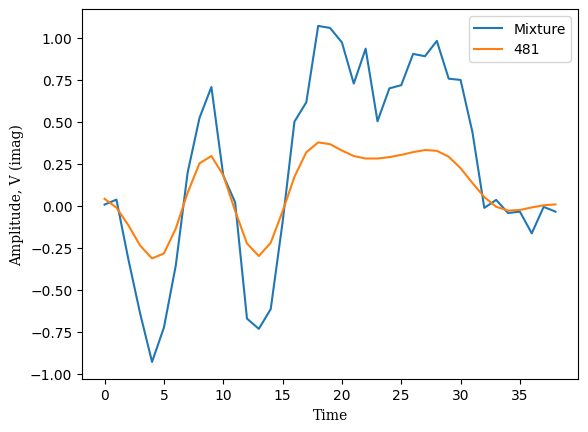

Append class: 1, centroids: [288], sources: [481], mixture coefficients: [0.99436543], shifts: [2]
Class: 1, centroid: 321, source: 356, shift: 2)


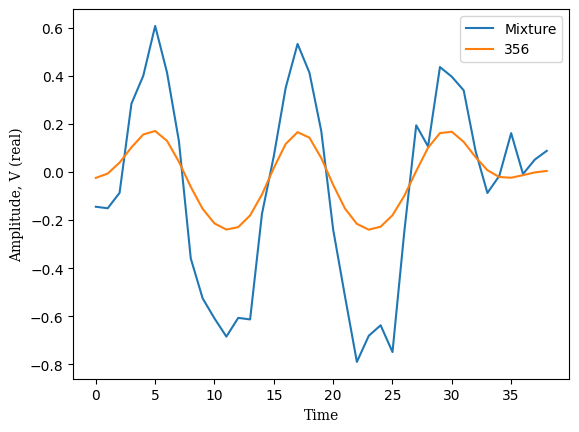

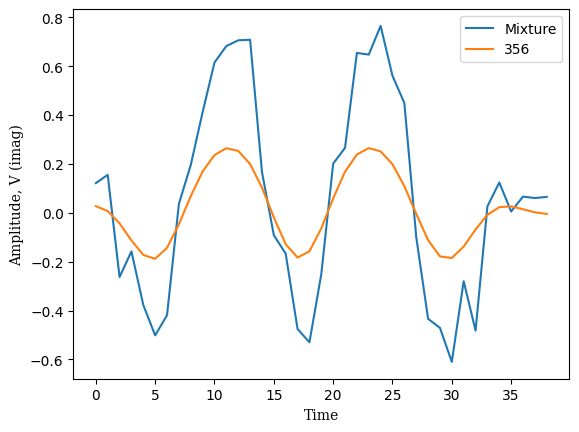

Append class: 1, centroids: [321], sources: [356], mixture coefficients: [0.70189218], shifts: [2]
Class: 2, centroid: 993, source: 782, shift: -2)
Class: 2, centroid: 471, source: 527, shift: 1)


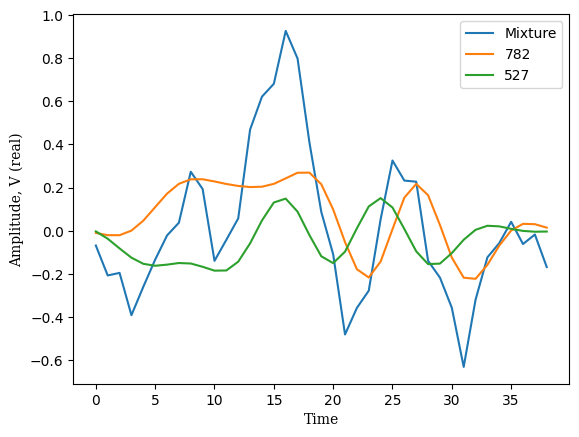

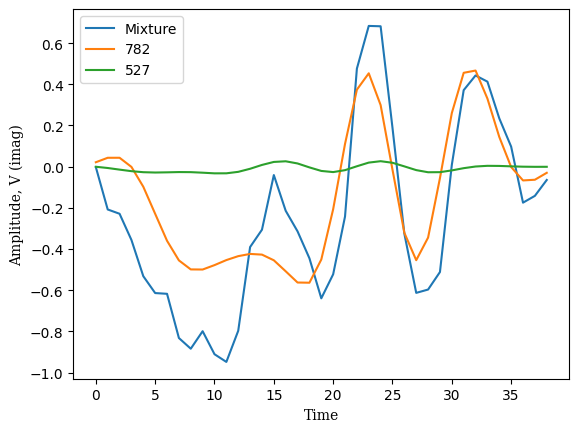

Append class: 2, centroids: [993 471], sources: [782, 527], mixture coefficients: [0.5114597  0.42504019], shifts: [-2, 1]
Class: 2, centroid: 704, source: 620, shift: 1)
Class: 2, centroid: 65, source: 65, shift: 0)


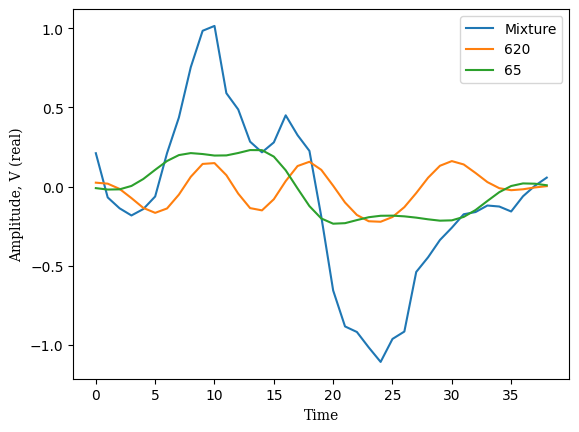

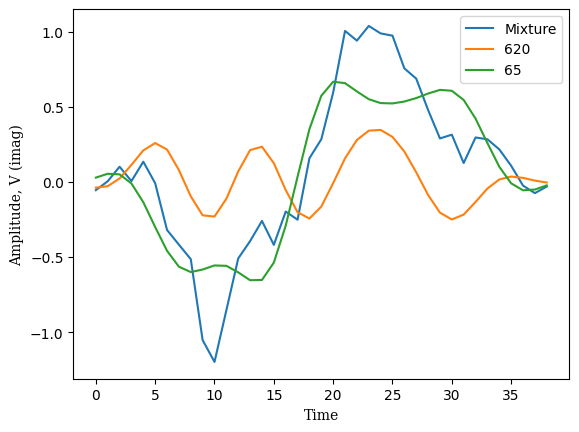

Append class: 2, centroids: [704  65], sources: [620, 65], mixture coefficients: [0.54518689 0.67363271], shifts: [1, 0]
Class: 2, centroid: 770, source: 903, shift: -1)
Class: 2, centroid: 195, source: 325, shift: 3)


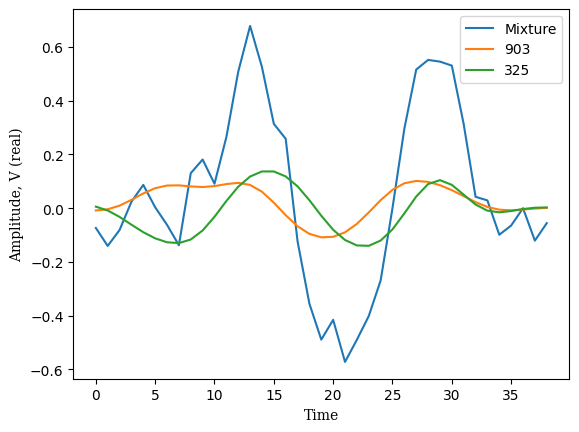

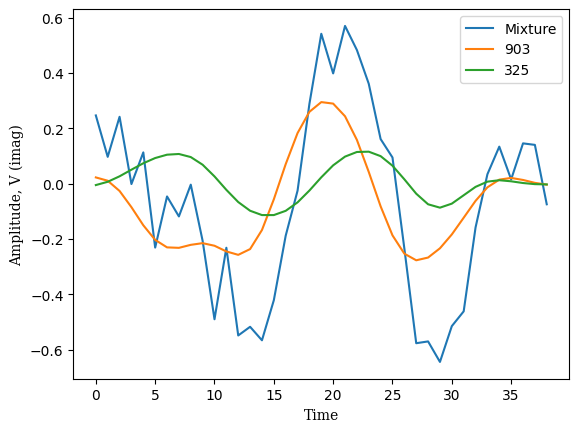

Append class: 2, centroids: [770 195], sources: [903, 325], mixture coefficients: [0.39319977 0.32047734], shifts: [-1, 3]
Class: 2, centroid: 899, source: 899, shift: 0)
Class: 2, centroid: 963, source: 50, shift: 2)


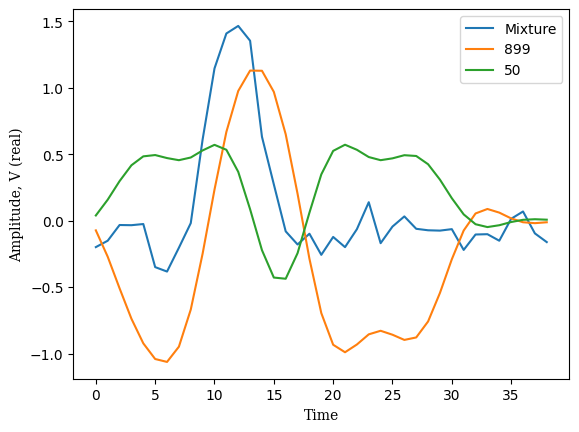

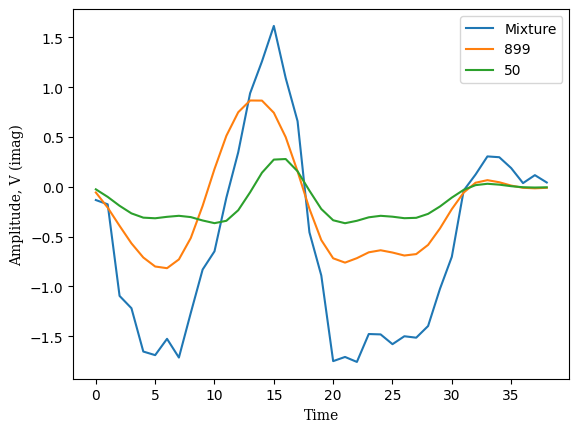

Append class: 2, centroids: [899 963], sources: [899, 50], mixture coefficients: [1.05936635 0.84261504], shifts: [0, 2]
Class: 3, centroid: 256, source: 478, shift: -3)
Class: 3, centroid: 576, source: 621, shift: 1)
Class: 3, centroid: 675, source: 292, shift: 0)


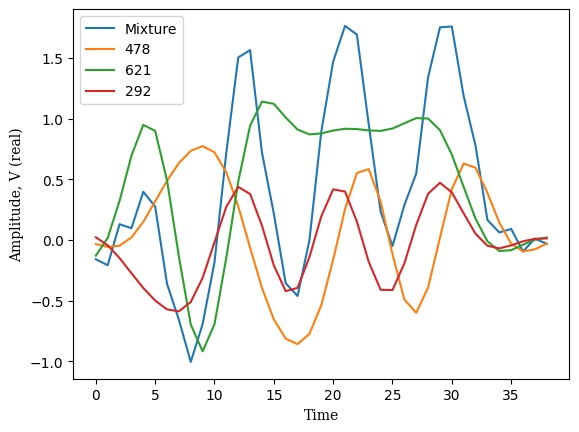

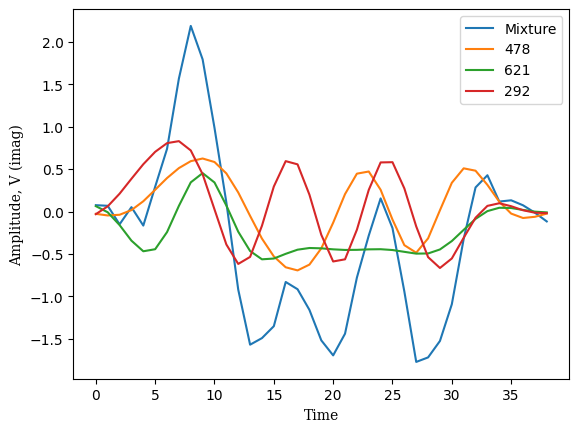

Append class: 3, centroids: [256 576 675], sources: [478, 621, 292], mixture coefficients: [0.65850112 1.06130685 1.03622352], shifts: [-3, 1, 0]
Class: 3, centroid: 675, source: 476, shift: -3)
Class: 3, centroid: 674, source: 505, shift: 1)
Class: 3, centroid: 0, source: 519, shift: 1)


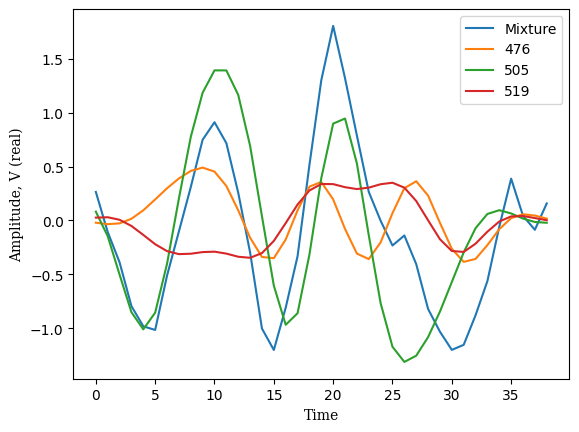

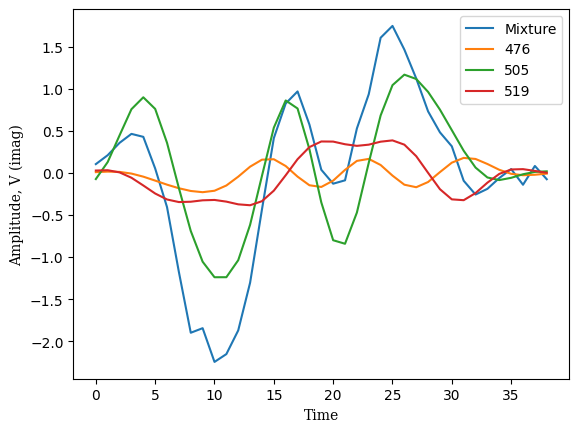

Append class: 3, centroids: [675 674   0], sources: [476, 505, 519], mixture coefficients: [0.39832593 1.18698913 0.76392634], shifts: [-3, 1, 1]
Class: 3, centroid: 385, source: 530, shift: 2)
Class: 3, centroid: 544, source: 928, shift: 2)
Class: 3, centroid: 641, source: 314, shift: -1)
Class: 3, centroid: 954, source: 113, shift: 0)


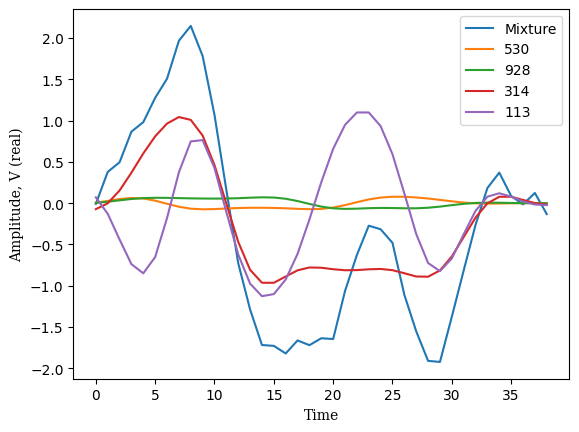

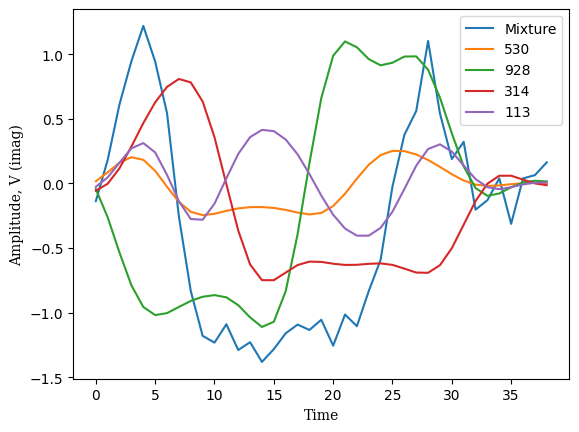

Append class: 3, centroids: [385 544 641 954], sources: [530, 928, 314, 113], mixture coefficients: [0.59130071 0.9110111  1.14190074 1.10115218], shifts: [2, 2, -1, 0]
Class: 3, centroid: 256, source: 370, shift: 0)
Class: 3, centroid: 777, source: 996, shift: 0)
Class: 3, centroid: 545, source: 850, shift: 0)


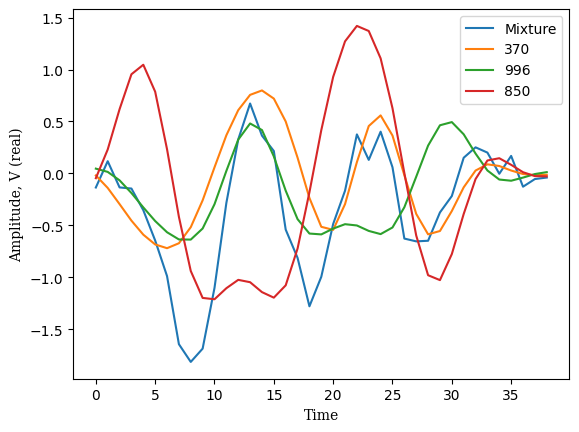

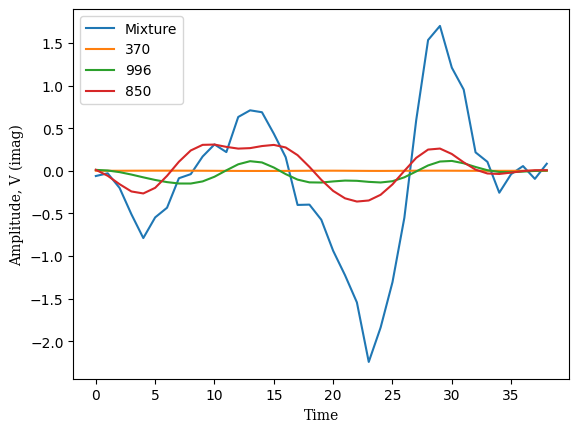

Append class: 3, centroids: [256 777 545], sources: [370, 996, 850], mixture coefficients: [0.61709879 0.88310167 0.82450279], shifts: [0, 0, 0]
Class: 3, centroid: 131, source: 68, shift: 0)
Class: 3, centroid: 514, source: 775, shift: -2)
Class: 3, centroid: 609, source: 373, shift: 3)


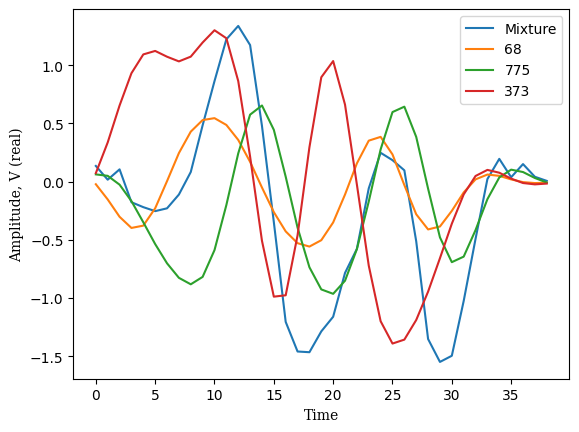

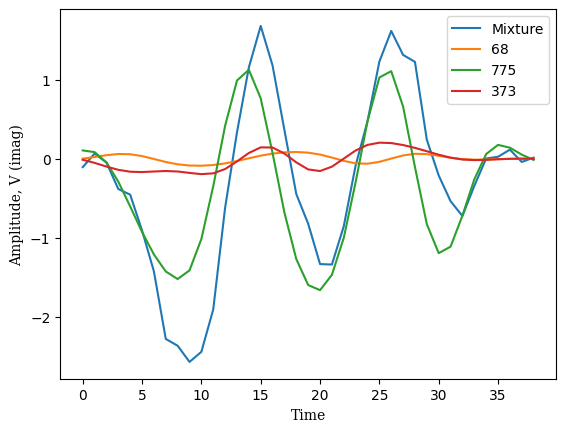

Append class: 3, centroids: [131 514 609], sources: [68, 775, 373], mixture coefficients: [0.83002859 1.18544335 0.85726975], shifts: [0, -2, 3]


In [ ]:
# Four-class classification, data generation
MAX_MIX = 6 # Maximum number of mixtures signals
MAX_AMP = 0.3 # V Minimum and maximum RMS amplitude of I/Q data signal
MIN_AMP = 1.2 # V

# Set a new data structure (dict or dataframe wait)
db_data = np.empty((0, iqdata.shape[1]), dtype=complex)
db_label = []
db_sourc = []
db_basis = []
db_coeff = []
db_shift = []

# Generate four classes: 0, 1, 2, 3, probably imbalanced
new_cls_size = [2,3,4,5] # Set small variables for demo mode

# For each class # Generate the sample set as a mixture of signals
for cls, sample_size in enumerate(new_cls_size):
  for _ in range(sample_size):
    # For each new item in the sample set prepare a mixture
    # How many items are in the mixture?
    if cls < 3: # 0: just noise, 1: single signal, 2: two signals
      cls_mix = cls
    else:
      cls_mix = np.random.choice(list(range(3,MAX_MIX))) # 3 or more signals

    # Each transmitter sends its unique code (no identical sources)
    idx_clus = np.random.choice(list(dict_cluster.keys()), cls_mix, replace=False)
    idx_src = [np.random.choice(dict_cluster.get(i), 1)[0] for i in idx_clus]

    coeffs = np.random.uniform(MIN_AMP, MAX_AMP, size=len(idx_src))
    signals = iqdata[idx_src]
    signals = scale_complex(signals, coeffs)

    mixture = iqnoise[np.random.choice(iqnoise.shape[0])] # A mixtire has its noise
    mixture = mixture + np.sum(signals, axis=0)

    # Counting shifts from the basis vectores
    shfits = []
    for i, j in zip(idx_clus, idx_src):
      x = iqdata[i] # Cluster as basis
      y = iqdata[j] # To approximate
      err_min, best_b, best_shift = find_shiftX_exhaust(x, np.array([]), y, 7)
      shfits.append(best_shift)
      x1 = shift_x(x, best_shift)

      print(f'Class: {cls}, centroid: {i}, source: {j}, shift: {best_shift})')
      # plt.plot(x.real, label ='Centroid')
      # plt.plot(y.real, label ='Source')
      # plt.plot(x1.real,label ='Centroid shifted')
      # plt.xlabel('Time', fontname='DejaVu Serif')
      # plt.ylabel('Amplitude, V (real)', fontname='DejaVu Serif')
      # plt.legend()
      # plt.show()

      # plt.plot(x.imag, label ='Centroid')
      # plt.plot(y.imag, label ='Source')
      # plt.plot(x1.imag,label ='Centr Shifted')
      # plt.xlabel('Time', fontname='DejaVu Serif')
      # plt.ylabel('Amplitude, V (imaginary)', fontname='DejaVu Serif')
      # plt.legend()
      # plt.show()

    # Store all: mixture, its class, its sources, its coeffs
    db_data = np.vstack((db_data, mixture))
    db_label.append(cls)
    db_sourc.append(idx_src)
    db_basis.append(idx_clus)
    db_coeff.append(coeffs)
    db_shift.append(shfits)

    plt.plot(mixture.real, label = 'Mixture')
    for c, j in enumerate(idx_src):
      pltmixture = coeffs[c] * iqdata[j]
      plt.plot(pltmixture.real, label = str(j))
    plt.xlabel('Time', fontname='DejaVu Serif')
    plt.ylabel('Amplitude, V (real)', fontname='DejaVu Serif')
    plt.legend()
    plt.show()

    plt.plot(mixture.imag, label = 'Mixture')
    for c, j in enumerate(idx_src):
      pltmixture = coeffs[c] * iqdata[j]
      plt.plot(pltmixture.imag, label = str(j))
    plt.xlabel('Time', fontname='DejaVu Serif')
    plt.ylabel('Amplitude, V (imag)', fontname='DejaVu Serif')
    plt.legend()
    plt.show()
    print(f'Append class: {cls}, centroids: {idx_clus}, sources: {idx_src}, mixture coefficients: {coeffs}, shifts: {shfits}')

# The previous format of the dataset
Xsrc4 = db_data.copy()
Ysrc4 = db_label.copy()
Yidx16 = db_sourc.copy()

In [ ]:

print(Yidx16)


[[], [], [580], [481], [356], [782, 527], [620, 65], [903, 325], [899, 50], [478, 621, 292], [476, 505, 519], [530, 928, 314, 113], [370, 996, 850], [68, 775, 373]]


Index in the dataset 9
[478, 621, 292]


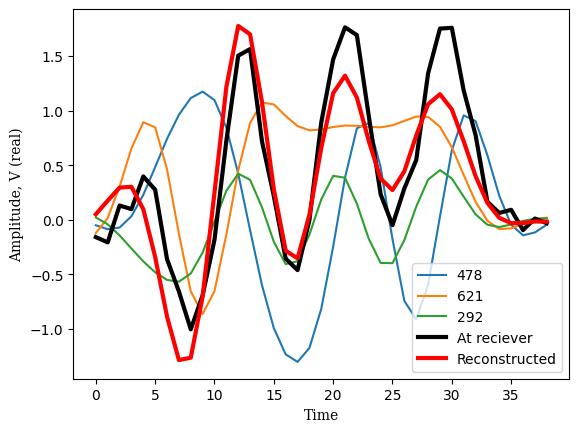

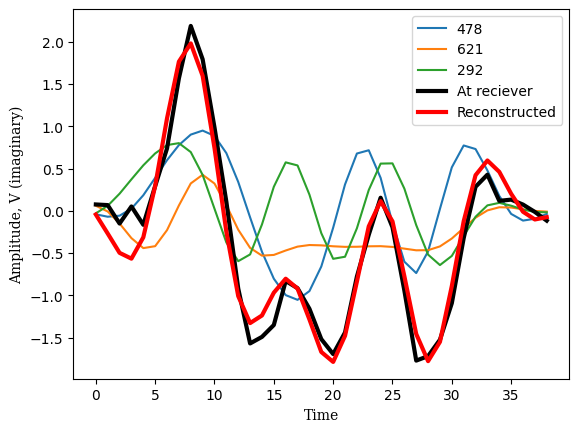

In [ ]:
# The columns matrix X, the centroids, are the features.
# The mixed signal is the target. Select the features that approximate the target.
# Use the columns of X as the basis

# Print the mixture and the source signals
i_show = 9 # 3456 # np.random.choice(len(Ysrc4), 1)[0] # 2909 # 3092
print('Index in the dataset', i_show)
mix_idx = Yidx16[i_show]
mixture = Xsrc4[i_show,:]
mix_cls = [int(num) for num in mix_idx if num > -1]
print(mix_idx)

#-------------------------------------------------------------------------------
# Reconstruct the known basis
idx_j = [int(num) for num in mix_idx if num > -1]
added_shift = list()
added_basis = np.empty((len(mixture), 0), dtype=complex)
for j in idx_j:
  x = iqdata[j] # Here will be the basis
  err_min, best_b, best_shift = find_shiftX_exhaust(x, added_basis, mixture, 7)
  added_basis = np.column_stack((added_basis, x)) # store non-shifted item
  added_shift.append(best_shift)

X_shifted = shift_X(added_basis, added_shift)
b = np.linalg.lstsq(X_shifted, mixture, rcond=None)[0]
y1 = X_shifted @ b # Restored signal
#-------------------------------------------------------------------------------

for m in [int(num) for num in mix_idx if num > -1]:
  plt.plot(iqdata.real[m], label=str(m))
plt.plot(mixture.real, color='black', linewidth=3, label = 'At reciever')
plt.plot(y1.real, color='red', linewidth=3, label = 'Reconstructed')
plt.xlabel('Time', fontname='DejaVu Serif')
plt.ylabel('Amplitude, V (real)', fontname='DejaVu Serif')
plt.legend()
plt.show()

for m in [int(num) for num in mix_idx if num > -1]:
  plt.plot(iqdata.imag[m], label=str(m))
plt.plot(mixture.imag, color='black', linewidth=3, label = 'At reciever')
plt.plot(y1.imag, color='red', linewidth=3, label = 'Reconstructed')
plt.xlabel('Time', fontname='DejaVu Serif')
plt.ylabel('Amplitude, V (imaginary)', fontname='DejaVu Serif')
plt.legend()
plt.show()
